In [32]:
import pandas as pd
import seaborn as sns
from pylab import *

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RANSACRegressor, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# generate data
def gen_data(num_data, sigma):
    x = 2 * np.pi * (np.random.rand(num_data) - 0.5)
    y = np.sin(x) + np.random.normal(0, sigma, num_data)
    return (x, y)

#### n=30

In [3]:
num_data = 30
sigma = 0.2
x, y = gen_data(num_data, sigma)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


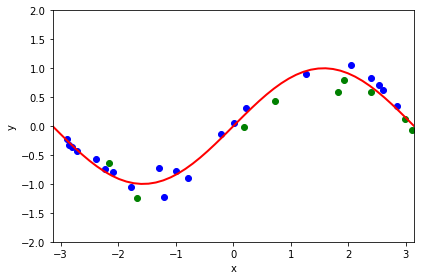

In [4]:
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='green')

x_grid = np.linspace(-1*np.pi, 1*np.pi)
sin_x = np.sin(x_grid)
plt.plot(x_grid, sin_x, color = 'red', linewidth = 2)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-np.pi, np.pi)
plt.ylim(-2, 2)
plt.tight_layout()
plt.savefig('./output/fig-dataset-sin.png', dpi=300)
plt.show()


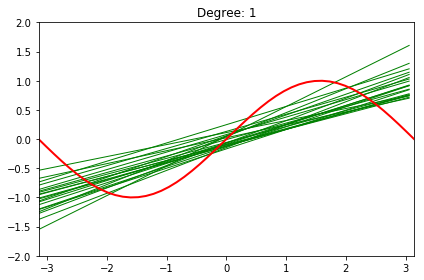

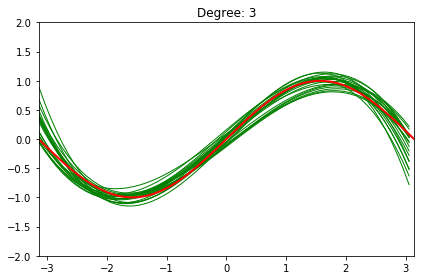

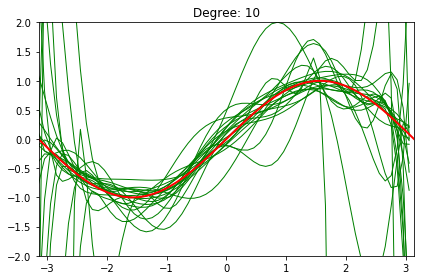

In [5]:
degree = [1, 3, 10]
std_list = []
for d in degree:
    X_fit = np.arange(-np.pi, np.pi, 0.1)[:, np.newaxis]
    poly = PolynomialFeatures(degree=d)
    
    for i in range(20):
        x, y = gen_data(num_data, sigma)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
        
        regr = LinearRegression()
        regr = regr.fit(poly.fit_transform(x_train[:,np.newaxis]), y_train[:,np.newaxis])
        y_fit = regr.predict(poly.transform(X_fit))
        
        plt.plot(X_fit, y_fit, color='green', lw=1)
        
    x_grid = np.linspace(-1*np.pi, 1*np.pi)
    sin_x = np.sin(x_grid)
    plt.plot(x_grid, sin_x, color='red', linewidth = 2)
    
    plt.title('Degree: %d' %d)
    plt.xlim(-np.pi, np.pi)
    plt.ylim(-2, 2)
    plt.tight_layout()
    plt.savefig('./output/fig-polyreg-%d.png' % d, dpi=300)
    plt.show()


#### n=50

In [6]:
num_data = 50
x, y = gen_data(num_data, sigma)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [8]:
mse_train = []
mse_test = []

max_degree = 12
for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(x_train[:,newaxis])
    X_test_poly = poly.transform(x_test[:,newaxis])
    
    regr = LinearRegression()
    regr = regr.fit(X_train_poly, y_train)
    y_train_pred = regr.predict(X_train_poly)
    y_test_pred = regr.predict(X_test_poly)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    

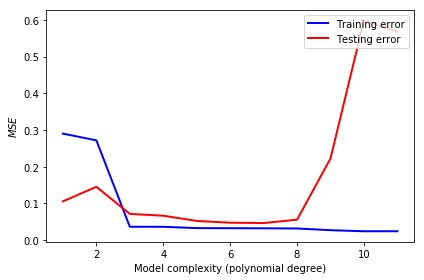

In [9]:
plt.plot(range(1, max_degree), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), mse_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()


#### n=120

In [10]:
num_data = 120
sigma = 1
degree = [1, 3, 10]
x, y = gen_data(num_data, sigma)

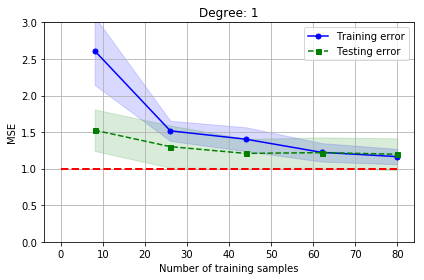

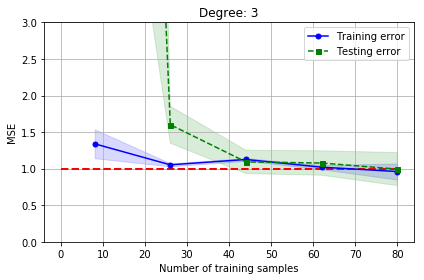

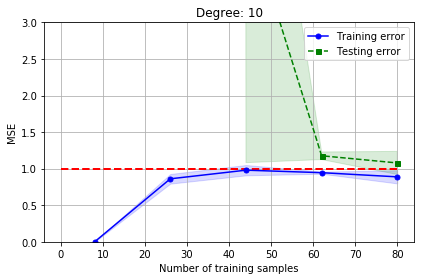

In [14]:
# Learning Curves and Sample Complexity
def mse(model, X, y):
    return ((model.predict(X) - y)**2).mean()

for d in degree:
    poly = PolynomialFeatures(degree=d)
    X = poly.fit_transform(x[:, np.newaxis])
    
    lr = LinearRegression()
    train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X, y=y, scoring=mse)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5,
             label='Training error')
    plt.fill_between(train_sizes,
                     train_mean+train_std,
                     train_mean-train_std,
                     alpha=0.15, color='blue')
    
    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Testing error')
    plt.fill_between(train_sizes,
                     test_mean+test_std,
                     test_mean-test_std,
                     alpha=0.15, color='green')
    
    plt.hlines(y=sigma, xmin=0, xmax=80, color='red', linewidth=2, linestyle='--')
    
    plt.title('Degree: %d' % d)
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('MSE')
    plt.legend(loc='upper right')
    plt.ylim([0, 3])
    plt.tight_layout()
    plt.savefig('./output/fig-learning-curve-%d.png' % d, dpi=300)
    plt.show()
    

In [15]:
# Weigh Decay
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

print ("size of training :", X_train.shape[0])
print ("size of testing  :", X_test.shape[0])
print ("size of feature  :", X_train.shape[1])

size of training : 354
size of testing  : 152
size of feature  : 560


### Ridge

In [29]:
for a in [0, 1, 10, 100, 1000]:
    lr_rg = Ridge(alpha=a)
    lr_rg.fit(X_train, y_train)
    
    y_train_pred = lr_rg.predict(X_train)
    y_test_pred = lr_rg.predict(X_test)
    
    print('\n[Alpha = %.2f]' % a)
    print('MSE train: %.2f, test: %.2f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))  
    


[Alpha = 0.00]
MSE train: 0.00, test: 19958.68

[Alpha = 1.00]
MSE train: 0.73, test: 23.05

[Alpha = 10.00]
MSE train: 1.66, test: 16.83

[Alpha = 100.00]
MSE train: 3.60, test: 15.16

[Alpha = 1000.00]
MSE train: 8.81, test: 19.22


C:\Users\stat_pc\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.073376632130006e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)


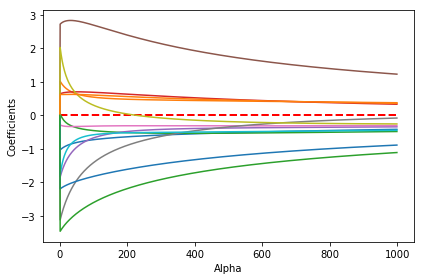

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

max_alpha = 1000
coef_ = np.zeros((max_alpha, 13))

for a in range(1, max_alpha):
    lr_rg = Ridge(alpha=a)
    lr_rg.fit(X_train, y_train)
    
    y_train_pred = lr_rg.predict(X_train)
    y_test_pred = lr_rg.predict(X_test)
    coef_[a, :] = lr_rg.coef_.reshape(1, -1)
    
plt.hlines(y=0, xmin=0, xmax=max_alpha, color='red', linewidth = 2, linestyle = '--')

for i in range(13):
    plt.plot(range(max_alpha), coef_[:,i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.savefig('./output/fig-ridge-decay.png', dpi=300)
plt.show()

### Lasso

In [26]:
for a in [0.001, 0.01, 0.1, 1, 10]:
    lr_rg = Lasso(alpha=a)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_test_pred = lr_rg.predict(X_test)

    print('\n[Alpha = %.2f]' % a )
    print('MSE train: %.2f, test: %.2f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))  
    


[Alpha = 0.00]
MSE train: 19.96, test: 27.20

[Alpha = 0.01]
MSE train: 19.96, test: 27.28

[Alpha = 0.10]
MSE train: 20.42, test: 28.33

[Alpha = 1.00]
MSE train: 26.04, test: 33.41

[Alpha = 10.00]
MSE train: 84.76, test: 83.77


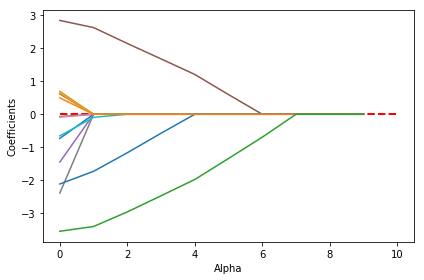

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

max_alpha = 10
coef_ = np.zeros((max_alpha,13))

for a in range(10):
    lr_rg = Lasso(alpha=a+0.1)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_test_pred = lr_rg.predict(X_test)
    coef_[a,:] = lr_rg.coef_.reshape(1,-1)
    
plt.hlines(y=0, xmin=0, xmax=max_alpha, color='red', linewidth = 2, linestyle = '--')

for i in range(13):
    plt.plot(range(max_alpha),coef_[:,i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.savefig('./output/fig-ridge-decay.png', dpi=300)
plt.show()

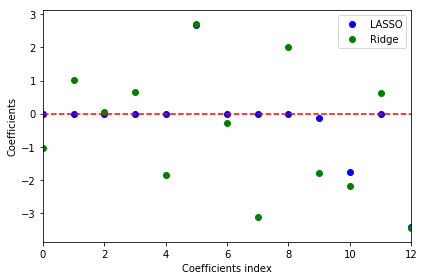

In [31]:
var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 1)
lr_lasso.fit(X_train, y_train)
lr_ridge = Ridge(alpha = 1)
lr_ridge.fit(X_train, y_train)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,12)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

All attributes:


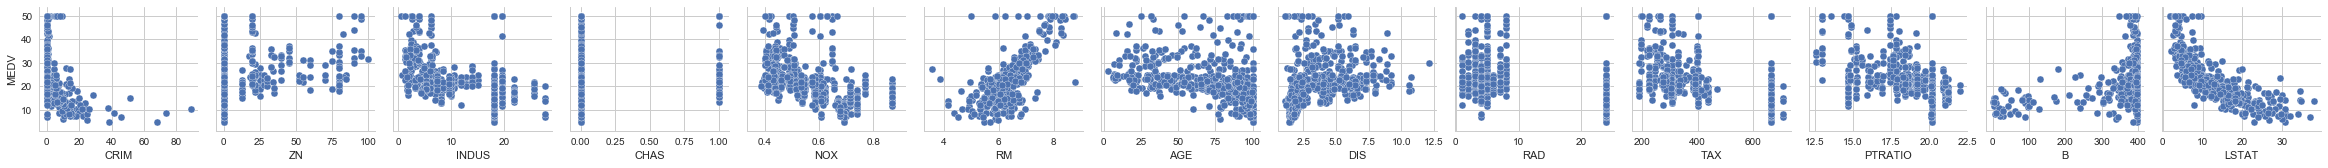

Selected attributes:


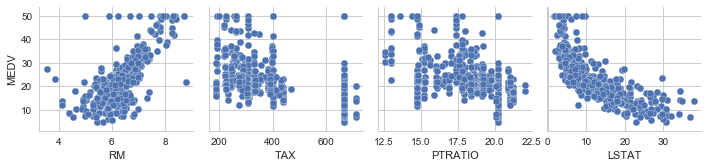

In [33]:
print('All attributes:')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=['MEDV'], size=2.5)
plt.tight_layout()
plt.show()

df1 = df[['RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]
print('Selected attributes:')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df1,x_vars=df1.columns[:-1], y_vars=['MEDV'], size=2.5)
plt.tight_layout()
plt.show()
sns.reset_orig()

In [34]:
# Outliers
X = df['RM'].values[:, np.newaxis]
y = df['MEDV'].values


In [35]:
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         residual_threshold=16.0, 
                         random_state=0)
ransac.fit(X, y)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=16.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

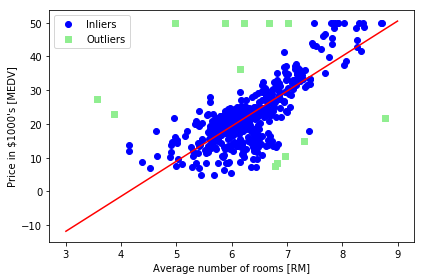


[RANSAC]
Slope (w_1): 10.38    Intercept (w_0): -42.94

[Ordinary least square]
Slope (w_1): 9.10    Intercept (w_0): -34.67


In [36]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print('\n[RANSAC]')
print('Slope (w_1): {:.2f}    Intercept (w_0): {:.2f}'.format(ransac.estimator_.coef_[0],ransac.estimator_.intercept_))

slr = LinearRegression()
slr.fit(X, y)
print('\n[Ordinary least square]')
y_pred = slr.predict(X)
print('Slope (w_1): {:.2f}    Intercept (w_0): {:.2f}'.format(slr.coef_[0],slr.intercept_))


In [37]:
# Validation
X = df.iloc[:, :-1].values
y = df['MEDV'].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

for d in range(1, 7):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_std)

    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=0.3, random_state=0)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.3, random_state=0)
    
    rg = Ridge(alpha=100)
    rg.fit(X_train, y_train)
    
    y_train_pred = rg.predict(X_train)
    y_valid_pred = rg.predict(X_valid)
    y_test_pred = rg.predict(X_test)
    
    print('\n[Degree = %d]' % d)
    print('MSE train: %.2f, valid: %.2f, test: %.2f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred),
                    mean_squared_error(y_test, y_test_pred))) 


[Degree = 1]
MSE train: 25.00, valid: 21.43, test: 32.09

[Degree = 2]
MSE train: 9.68, valid: 14.24, test: 20.24

[Degree = 3]
MSE train: 3.38, valid: 17.74, test: 18.63

[Degree = 4]
MSE train: 1.72, valid: 16.67, test: 30.98

[Degree = 5]
MSE train: 0.97, valid: 59.73, test: 57.02

[Degree = 6]
MSE train: 0.60, valid: 1444.08, test: 33189.41
